In [2]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

base_path = os.path.dirname(os.getcwd())
sys.path.insert(0, base_path)

In [3]:
def calculate_overtalk_percentage(call_data: list) -> tuple:
        total_call_duration = call_data[-1]['etime'] - call_data[0]['stime']
        overtalk_duration = 0
        
        for i in range(len(call_data) - 1):
            current_speaker = call_data[i]
            next_speaker = call_data[i + 1]
            
            # Check if there is overlap
            overlap = current_speaker['etime'] - next_speaker['stime']
            if overlap > 0:
                overtalk_duration += overlap
        
        overtalk_percentage = (overtalk_duration / total_call_duration) * 100
        return round(overtalk_percentage, 2), overtalk_duration

In [ ]:
def visualize(overtalk_percentage: list, overtalk_duration: list, number_of_calls: int) -> None:
        average_overtalk_percentage = sum(overtalk_percentage) / number_of_calls
        average_overtalk_duration = sum(overtalk_duration) / number_of_calls

        data = {
        "Metric": ["Avg Overtalk Percentage", "Avg Overtalk Duration"],
        "Value": [average_overtalk_percentage, average_overtalk_duration]
        }
        
        df = pd.DataFrame(data)
        
        plt.figure(figsize=(6, 5))
        bars = plt.bar(df["Metric"], df["Value"], color=['blue', 'green'], width=0.6)
        plt.xlabel("Overtalk Metrics")
        plt.ylabel("Value")
        plt.title("Comparison of Overtalk Percentage and Duration")
        plt.ylim(0, max(average_overtalk_percentage, average_overtalk_duration) * 1.2)

        for i, bar in enumerate(bars):
            label = f'{bar.get_height():.2f} %' if i == 0 else f'{bar.get_height():.2f} seconds'
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label, 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        plt.show()
        


def overtalk_metrics(file_paths: list) -> None:
    overtalk_percentage = []
    overtalk_duration = []
    number_of_calls = 0
    for file_path in file_paths:
        with open(file_path, "r") as file:
            call_data = json.load(file)
            if len(call_data) > 0:
                percentage, duration = calculate_overtalk_percentage(call_data)
                overtalk_percentage.append(percentage)
                overtalk_duration.append(duration)
                number_of_calls += 1

    visualize(overtalk_percentage, overtalk_duration, number_of_calls) 

In [23]:
dir_path = os.path.join(base_path, "All_Conversations")
file_paths = [os.path.join(dir_path, file) for file in os.listdir(dir_path) if file.endswith(".json")]

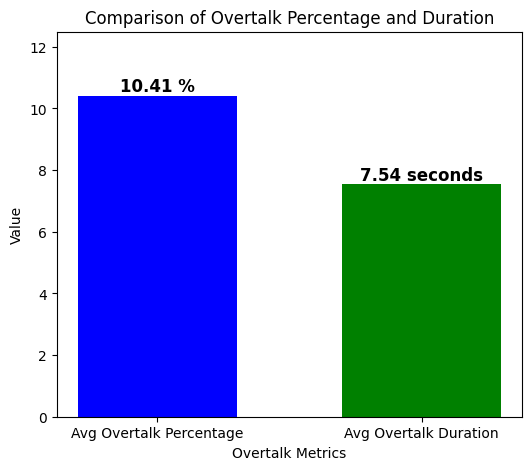

In [24]:
overtalk_metrics(file_paths)